In [1]:
# Verificar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
    print(" Ejecutándose en Google Colab")
except ImportError:
    IN_COLAB = False
    print(" No está en Google Colab")

# Verificar recursos disponibles en Colab
if IN_COLAB:
    # Verificar GPU disponible
    import tensorflow as tf
    print(" Verificando recursos de hardware:")
    print(f"   - GPUs disponibles: {len(tf.config.list_physical_devices('GPU'))}")

    if len(tf.config.list_physical_devices('GPU')) > 0:
        print("   - Tipo GPU:", tf.config.list_physical_devices('GPU')[0])
        print("    GPU activada - Ideal para Deep Learning")
    else:
        print("     Solo CPU disponible - Suficiente para esta práctica")

    # Verificar RAM disponible
    import psutil
    ram_gb = round(psutil.virtual_memory().total / (1024**3), 1)
    print(f"   - RAM disponible: {ram_gb} GB")
    print(f"   - Almacenamiento temporal: ~100GB")

# Instalar librerías adicionales específicas para Colab
if IN_COLAB:
    print("\n Instalando librerías adicionales en Colab...")
    !pip install -q plotly kaleido  # Para gráficos interactivos
    !pip install -q seaborn --upgrade  # Asegurar última versión
    print(" Instalación completada")

 Ejecutándose en Google Colab
 Verificando recursos de hardware:
   - GPUs disponibles: 0
     Solo CPU disponible - Suficiente para esta práctica
   - RAM disponible: 12.7 GB
   - Almacenamiento temporal: ~100GB

 Instalando librerías adicionales en Colab...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.2 MB/s eta 0:00:00
 Instalación completada


In [2]:
# Importaciones optimizadas para Colab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importaciones específicas para ML/DL
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuración específica para Colab
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización optimizada para Colab
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)  # Más grande para pantallas Colab
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100  # Mejor resolución en Colab

# Configurar plotly para Colab
import plotly.io as pio
pio.renderers.default = 'colab'  # Renderizado específico para Colab

print("\n Configuración específica para Google Colab completada")
print("=" * 60)


 Configuración específica para Google Colab completada


In [3]:
# ========================================================================
# FUNCIONES ESPECÍFICAS PARA COLAB
# ========================================================================

def conectar_google_drive():
    """Función para conectar con Google Drive en Colab"""
    if IN_COLAB:
        from google.colab import drive
        try:
            drive.mount('/content/drive')
            print(" Google Drive conectado exitosamente")
            return True
        except Exception as e:
            print(f" Error conectando Google Drive: {e}")
            return False
    else:
        print(" Esta función solo funciona en Google Colab")
        return False

def guardar_en_drive(df, filename):
    """Función para guardar un DataFrame en Google Drive"""
    if IN_COLAB:
        try:
            filepath = f'/content/drive/My Drive/Modulo AI/{filename}'
            df.to_csv(filepath, index=False)
            print(f" '{filename}' guardado en Google Drive")
        except Exception as e:
            print(f" Error guardando '{filename}' en Google Drive: {e}")
    else:
        print(" Esta función solo funciona en Google Colab")


def mostrar_grafico_interactivo(fig):
    """Mostrar gráficos Plotly optimizados para Colab"""
    if IN_COLAB:
        fig.show()
    else:
        fig.show(renderer='browser')

In [4]:
# Opción 1: Datasets integrados
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Opción 2: Cargar desde URL (aprovechando conectividad de Colab)
print("\nMétodo 2: Cargar desde URL")
try:
    # Dataset de Titanic desde UCI
    # Using a known working URL for the Titanic dataset
    titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    # The column names will be read directly from the CSV header, no need to define them explicitly
    # titanic_columns = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
    #                    'parch', 'ticket', 'fare', 'cabin', 'embarked']

    # titanic_df_from_url = pd.read_csv(titanic_url, names=titanic_columns)
    titanic_df_from_url = pd.read_csv(titanic_url)
    print(f" Titanic dataset desde URL: {titanic_df_from_url.shape}")
    display(titanic_df_from_url.head())

except Exception as e:
    print(f" No se pudo cargar dataset desde URL: {e}")
    titanic_df_from_url = None


Método 2: Cargar desde URL
 Titanic dataset desde URL: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# •	Ejercicios de manipulación de arrays con NumPy

In [6]:
# Crear un array a partir de una lista de Python
arr_from_list = np.array([1, 2, 3, 4, 5])
print("Array desde lista:", arr_from_list)

# Crear un array de ceros con una forma específica (2x3)
arr_zeros = np.zeros((2, 3))
print("\nArray de ceros (2x3):\n", arr_zeros)

# Crear un array de unos con una forma específica (3x2)
arr_ones = np.ones((3, 2))
print("\nArray de unos (3x2):\n", arr_ones)

# Crear un array con valores dentro de un rango (similar a range)
arr_arange = np.arange(0, 10, 2) # Start, stop (exclusive), step
print("\nArray con arange (0 a 10 con paso 2):", arr_arange)

# Crear un array con un número específico de valores espaciados uniformemente dentro de un intervalo
arr_linspace = np.linspace(0, 10, 5) # Start, stop (inclusive), number of samples
print("\nArray con linspace (5 valores entre 0 y 10):", arr_linspace)

# Crear arrays de ejemplo para operaciones matemáticas
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

print("Array 1:", arr1)
print("Array 2:", arr2)
print("Matrix 1:\n", matrix1)
print("Matrix 2:\n", matrix2)

# Operaciones Elemento a Elemento
print("\nOperaciones Elemento a Elemento:")
print("Suma:", arr1 + arr2)
print("Resta:", arr1 - arr2)
print("Multiplicación:", arr1 * arr2)
print("División:", arr1 / arr2)
print("Potencia (arr1^2):", arr1 ** 2)

# Funciones de Agregación
print("\nFunciones de Agregación:")
print("Suma de arr1:", np.sum(arr1))
print("Media de arr1:", np.mean(arr1))
print("Desviación estándar de arr1:", np.std(arr1))
print("Valor máximo de arr1:", np.max(arr1))
print("Valor mínimo de arr1:", np.min(arr1))

# Funciones de Agregación en matrices (por eje)
print("\nFunciones de Agregación en Matrices (por eje):")
print("Suma de Matrix 1 (por filas):", np.sum(matrix1, axis=0)) # Suma por columnas
print("Suma de Matrix 1 (por columnas):", np.sum(matrix1, axis=1)) # Suma por filas

# Operaciones de Álgebra Lineal
print("\nOperaciones de Álgebra Lineal:")
# Producto punto de dos arrays 1D
dot_product_1d = np.dot(arr1, arr2)
print("Producto punto de arr1 y arr2:", dot_product_1d)

# Producto punto de dos matrices (multiplicación de matrices)
matrix_product = matrix1 @ matrix2 # Usando el operador @ (Python 3.5+)
# Alternativamente: matrix_product = np.dot(matrix1, matrix2)
print("Producto de Matrix 1 y Matrix 2:\n", matrix_product)

Array desde lista: [1 2 3 4 5]

Array de ceros (2x3):
 [[0. 0. 0.]
 [0. 0. 0.]]

Array de unos (3x2):
 [[1. 1.]
 [1. 1.]
 [1. 1.]]

Array con arange (0 a 10 con paso 2): [0 2 4 6 8]

Array con linspace (5 valores entre 0 y 10): [ 0.   2.5  5.   7.5 10. ]
Array 1: [1 2 3 4]
Array 2: [5 6 7 8]
Matrix 1:
 [[1 2]
 [3 4]]
Matrix 2:
 [[5 6]
 [7 8]]

Operaciones Elemento a Elemento:
Suma: [ 6  8 10 12]
Resta: [-4 -4 -4 -4]
Multiplicación: [ 5 12 21 32]
División: [0.2        0.33333333 0.42857143 0.5       ]
Potencia (arr1^2): [ 1  4  9 16]

Funciones de Agregación:
Suma de arr1: 10
Media de arr1: 2.5
Desviación estándar de arr1: 1.118033988749895
Valor máximo de arr1: 4
Valor mínimo de arr1: 1

Funciones de Agregación en Matrices (por eje):
Suma de Matrix 1 (por filas): [4 6]
Suma de Matrix 1 (por columnas): [3 7]

Operaciones de Álgebra Lineal:
Producto punto de arr1 y arr2: 70
Producto de Matrix 1 y Matrix 2:
 [[19 22]
 [43 50]]


# •	Análisis de datos con Pandas

In [7]:
# 1. Crear una Serie de Pandas a partir de una lista de Python
data_list = [10, 20, 30, 40, 50]
serie_from_list = pd.Series(data_list)
print("Serie creada a partir de una lista:")
print(serie_from_list)

# 2. Crear un DataFrame de Pandas a partir de un diccionario de Python
data_dict = {
    'columna1': [1, 2, 3, 4],
    'columna2': ['A', 'B', 'C', 'D'],
    'columna3': [True, False, True, False]
}
df_from_dict = pd.DataFrame(data_dict)
print("\nDataFrame creado a partir de un diccionario:")
print(df_from_dict)

# 3. Crear un DataFrame de Pandas a partir de un array de NumPy
data_numpy = np.random.rand(5, 3) # Array de 5 filas y 3 columnas
column_names = ['Feature_A', 'Feature_B', 'Feature_C']
df_from_numpy = pd.DataFrame(data_numpy, columns=column_names)
print("\nDataFrame creado a partir de un array de NumPy:")
print(df_from_numpy)

Serie creada a partir de una lista:
0    10
1    20
2    30
3    40
4    50
dtype: int64

DataFrame creado a partir de un diccionario:
   columna1 columna2  columna3
0         1        A      True
1         2        B     False
2         3        C      True
3         4        D     False

DataFrame creado a partir de un array de NumPy:
   Feature_A  Feature_B  Feature_C
0   0.884573   0.999078   0.224949
1   0.400516   0.601940   0.914703
2   0.682538   0.579230   0.208154
3   0.269739   0.156902   0.391482
4   0.366647   0.410951   0.612273


In [8]:
# Trying a different, commonly used URL for the Titanic dataset
titanic_url_alternative = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

try:
    titanic_df_alternative = pd.read_csv(titanic_url_alternative)

    print(f"Titanic dataset desde URL alternativa: {titanic_df_alternative.shape}")
except Exception as e:
    print(f"Error al cargar el dataset del Titanic desde la URL alternativa: {e}")
    titanic_df_alternative = None

Titanic dataset desde URL alternativa: (891, 12)


In [9]:
print("Mostrando las primeras 5 filas con head():")
display(titanic_df_alternative.head())

print("\nMostrando información general del DataFrame con info():")
titanic_df_alternative.info()

print("\nMostrando estadísticas descriptivas con describe():")
display(titanic_df_alternative.describe())

print("\nContando valores faltantes por columna con isnull().sum():")
display(titanic_df_alternative.isnull().sum())

Mostrando las primeras 5 filas con head():


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Mostrando información general del DataFrame con info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Mostrando estadísticas descriptivas con describe():


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Contando valores faltantes por columna con isnull().sum():


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Limpieza y Preparación de Datos con Pandas

In [12]:
print("--- Manejo de Valores Faltantes ---")
# Contar valores faltantes antes de tratar
print("Valores faltantes antes de limpiar:")
display(titanic_df_alternative.isnull().sum())

# Opción 1: Eliminar filas con valores faltantes en la columna 'Embarked'
# (Mostrando solo el impacto en el conteo de filas)
df_dropped_rows = titanic_df_alternative.dropna(subset=['Embarked'])
print(f"\nForma del DataFrame después de eliminar filas con NaN en 'Embarked': {df_dropped_rows.shape}")

# Opción 2: Eliminar la columna 'Cabin' por tener muchos valores faltantes
# (Mostrando solo el impacto en el conteo de columnas)
df_dropped_column = titanic_df_alternative.drop('Cabin', axis=1)
print(f"Forma del DataFrame después de eliminar la columna 'Cabin': {df_dropped_column.shape}")

# Opción 3: Rellenar valores faltantes en 'Age' con la media
# Creamos una copia para no modificar el DataFrame original para demostraciones posteriores
titanic_df_filled = titanic_df_alternative.copy()
mean_age = titanic_df_filled['Age'].mean()
titanic_df_filled['Age'].fillna(mean_age, inplace=True)

# Rellenar valores faltantes en 'Embarked' con el valor más frecuente (moda)
mode_embarked = titanic_df_filled['Embarked'].mode()[0] # mode() returns a Series
titanic_df_filled['Embarked'].fillna(mode_embarked, inplace=True)

print("\nValores faltantes después de rellenar 'Age' y 'Embarked':")
display(titanic_df_filled.isnull().sum())
print("Info del DataFrame después de rellenar:")
titanic_df_filled.info()

print("\n--- Eliminación de Duplicados ---")
print(f"Forma del DataFrame antes de eliminar duplicados: {titanic_df_alternative.shape}")

# Eliminar filas duplicadas
# Creamos una copia para no modificar el DataFrame original si no es necesario
titanic_df_no_duplicates = titanic_df_alternative.drop_duplicates()

print(f"Forma del DataFrame después de eliminar duplicados: {titanic_df_no_duplicates.shape}")

print("\n--- Cambio de Tipos de Datos ---")
print("Tipos de datos antes de cambiar:")
display(titanic_df_alternative.dtypes)

# Cambiar el tipo de datos de la columna 'Fare' a integer (puede haber NaNs o flotantes)
# Primero, rellenamos NaNs en 'Fare' si los hay, aunque .info() mostró 0, es buena práctica.
# Usaremos el DataFrame sin duplicados o el original dependiendo de la demostración.
# Usemos el original para mostrar el cambio sin el impacto de la eliminación de duplicados
titanic_df_type_changed = titanic_df_alternative.copy()

# Convert 'Fare' to integer, handling potential float values.
# We need to convert NaNs first if they existed, but info() shows 0 for Fare.
# If there were floats with decimals, converting to int will truncate.
# Let's convert 'PassengerId' to object as an example of changing to non-numeric
titanic_df_type_changed['PassengerId'] = titanic_df_type_changed['PassengerId'].astype(object)

# Let's convert 'Survived' to boolean as it's 0/1
titanic_df_type_changed['Survived'] = titanic_df_type_changed['Survived'].astype(bool)


print("\nTipos de datos después de cambiar 'PassengerId' a object y 'Survived' a boolean:")
display(titanic_df_type_changed.dtypes)
print("\nPrimeras filas con tipos de datos cambiados:")
display(titanic_df_type_changed.head())

--- Manejo de Valores Faltantes ---
Valores faltantes antes de limpiar:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



Forma del DataFrame después de eliminar filas con NaN en 'Embarked': (889, 12)
Forma del DataFrame después de eliminar la columna 'Cabin': (891, 11)

Valores faltantes después de rellenar 'Age' y 'Embarked':


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Info del DataFrame después de rellenar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Eliminación de Duplicados ---
Forma del DataFrame antes de eliminar duplicados: (891, 12)
Forma del DataFrame después de eliminar duplicados: (891, 12)

--- Cambio de Tipos de Datos ---
Tipos de dato

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64



Tipos de datos después de cambiar 'PassengerId' a object y 'Survived' a boolean:


,0
PassengerId,object
Survived,bool
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64



Primeras filas con tipos de datos cambiados:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Agrupación y Agregación de Datos con Pandas

In [13]:
print("--- Agrupación por 'Pclass' y cálculo de la media de 'Age' y 'Fare' ---")
# Group by 'Pclass' and calculate the mean of 'Age' and 'Fare' for each group
pclass_grouped_mean = titanic_df_alternative.groupby('Pclass')[['Age', 'Fare']].mean()
print("Media de Edad y Tarifa por Clase de Pasajero:")
display(pclass_grouped_mean)

print("\n--- Agrupación por 'Sex' y 'Survived' y conteo de pasajeros ---")
# Group by 'Sex' and 'Survived' and count the number of passengers in each group
# Using size() which returns a Series with group sizes
sex_survived_count = titanic_df_alternative.groupby(['Sex', 'Survived']).size()
print("Conteo de Pasajeros por Género y Supervivencia:")
display(sex_survived_count)

# Alternatively, using count() on a specific column
sex_survived_count_col = titanic_df_alternative.groupby(['Sex', 'Survived'])['PassengerId'].count()
print("\nConteo de Pasajeros por Género y Supervivencia (usando count()):")
display(sex_survived_count_col)

--- Agrupación por 'Pclass' y cálculo de la media de 'Age' y 'Fare' ---
Media de Edad y Tarifa por Clase de Pasajero:


,Age,Fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550



--- Agrupación por 'Sex' y 'Survived' y conteo de pasajeros ---
Conteo de Pasajeros por Género y Supervivencia:


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


Conteo de Pasajeros por Género y Supervivencia (usando count()):


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

### Visualización Básica de Datos con Pandas

--- Creando un histograma de la columna 'Age' ---


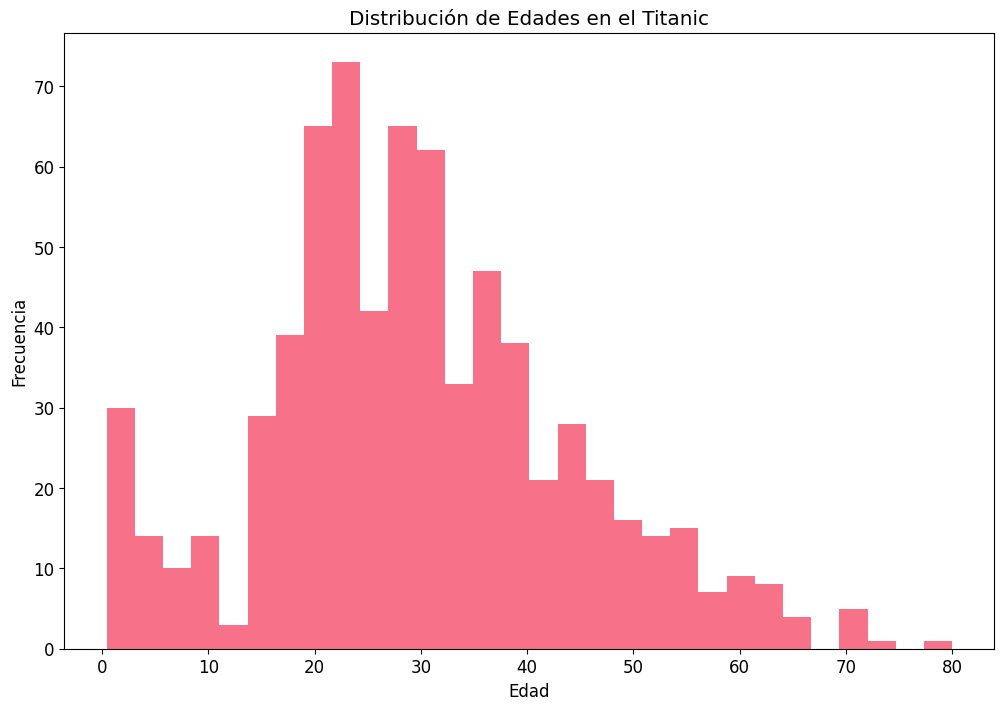


--- Creando un diagrama de dispersión de 'Age' vs 'Fare' ---


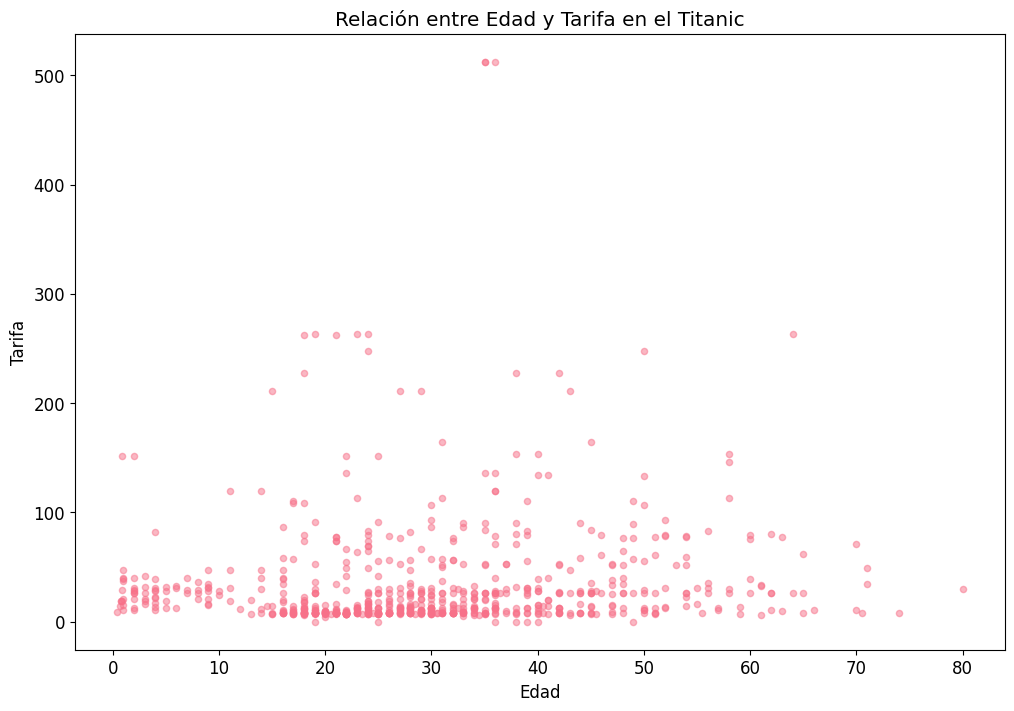

--- Creando un diagrama de caja de 'Fare' por 'Pclass' ---


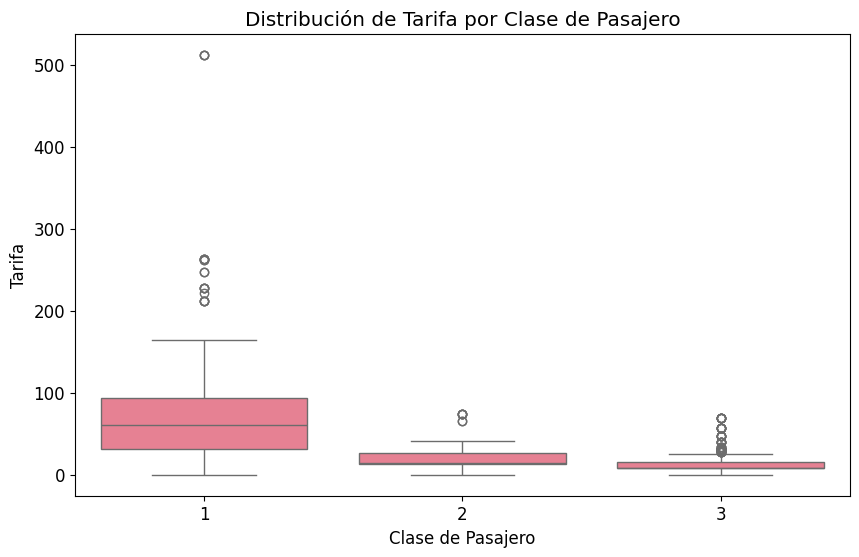

In [14]:
print("--- Creando un histograma de la columna 'Age' ---")
# Create a histogram of the 'Age' column from titanic_df_alternative
# Use .plot() with kind='hist' or just .hist()
titanic_df_alternative['Age'].plot(kind='hist', bins=30, title='Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show() # Ensure the plot is displayed

print("\n--- Creando un diagrama de dispersión de 'Age' vs 'Fare' ---")
# Create a scatter plot of 'Age' vs 'Fare' from titanic_df_alternative
titanic_df_alternative.plot(kind='scatter', x='Age', y='Fare', title='Relación entre Edad y Tarifa en el Titanic', alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show() # Ensure the plot is displayed

print("--- Creando un diagrama de caja de 'Fare' por 'Pclass' ---")
# Create a box plot of 'Fare' by 'Pclass' using seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df_alternative)
plt.title('Distribución de Tarifa por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tarifa')
plt.show()

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Autenticación de Google
from google.colab import auth
auth.authenticate_user()

# Configurar usuario git
!git config --global user.email "angelica.prado@uees.edu.ec"
!git config --global user.name "ANGELICA PRADO"

# Ingresar token personal de GitHub de forma segura
import getpass, os
os.environ['GITHUB_TOKEN'] = getpass.getpass('🔑 Introduce tu GitHub token personal (PAT): ')

# Eliminar repositorio local si existe
%cd /content
!rm -rf T1-AI-Titanic

# Clonar repositorio usando token para autenticación
!git clone https://{os.environ['GITHUB_TOKEN']}@github.com/Lolit-78/T1-AI-Titanic.git
%cd T1-AI-Titanic

# Copiar notebook desde Google Drive al repositorio local
NOTEBOOK_PATH = "/content/drive/MyDrive/Modulo AI/01_fundamentos_numpy_pandas.ipynb"
import shutil
if os.path.exists(NOTEBOOK_PATH):
    shutil.copy(NOTEBOOK_PATH, '.')
    print("✅ Notebook copiado correctamente al repositorio.")
else:
    raise FileNotFoundError(f"❌ ERROR: No se encontró el archivo en {NOTEBOOK_PATH}")

# Añadir archivo, commit y push
!git add 01_fundamentos_numpy_pandas.ipynb
!git commit -m "📊 Añadir notebook de fundamentos numpy y pandas"
!git branch -M main
!git push origin main

Mounted at /content/drive
